In [1]:
import pandas as pd
import numpy as np

### 4.6 缺失值处理

In [2]:
movie = pd.read_csv("./datasets/IMDB/IMDB-Movie-Data.csv")

In [3]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


- 判断是否存在NaN类型的缺失值

In [4]:
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [5]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

- 缺失值处理

In [6]:
# 方法1：删除含有缺失值的样本
data1 = movie.dropna()

In [7]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [8]:
pd.notnull(data1).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [9]:
# 方法2：替换

# 含有缺失值的字段
# Revenue (Millions)    
# Metascore
movie.fillna({"Revenue (Millions)": movie["Revenue (Millions)"].mean()}, inplace=True)
movie.fillna({"Metascore": movie["Metascore"].mean()}, inplace=True)

In [10]:
pd.notnull(movie).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

- 不是缺失值nan，有默认标记的

In [11]:
# 读取数据
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]


data = pd.read_csv(path, names=name)

In [12]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
# 1）替换
data_new = data.replace(to_replace="?", value=np.nan)

In [14]:
data_new

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [15]:
data_new.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [16]:
# 2）删除缺失值
data_new.dropna(inplace=True)

In [17]:
data_new.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [18]:
type(np.nan)

float

### 4.7 数据的离散化

In [19]:
# 1）准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [20]:
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [21]:
# 2）分组
# 自动分组
sr = pd.qcut(data, 3)

In [22]:
type(sr)

pandas.core.series.Series

In [23]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64, right]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [24]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
Name: count, dtype: int64

In [25]:
# 3）转换成one-hot编码
pd.get_dummies(sr, prefix="height")

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,False,True,False
No2:174,False,True,False
No3:160,True,False,False
No4:180,False,False,True
No5:159,True,False,False
No6:163,True,False,False
No7:192,False,False,True
No8:184,False,False,True


In [26]:
# 自定义分组
bins = [150, 165, 180, 195]
sr = pd.cut(data, bins)

In [27]:
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64, right]): [(150, 165] < (165, 180] < (180, 195]]

In [28]:
sr.value_counts()

(150, 165]    4
(165, 180]    2
(180, 195]    2
Name: count, dtype: int64

In [29]:
pd.get_dummies(sr, prefix="身高")

,"身高_(150, 165]","身高_(165, 180]","身高_(180, 195]"
No1:165,True,False,False
No2:174,False,True,False
No3:160,True,False,False
No4:180,False,True,False
No5:159,True,False,False
No6:163,True,False,False
No7:192,False,False,True
No8:184,False,False,True


- 案例：股票的涨跌幅离散化

In [30]:
# 1）读取数据
stock = pd.read_csv("./datasets/stock_day/stock_day.csv")

In [31]:
p_change = stock["p_change"]

In [32]:
p_change

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
              ... 
2015-03-06    8.51
2015-03-05    2.02
2015-03-04    1.57
2015-03-03    1.44
2015-03-02    2.62
Name: p_change, Length: 643, dtype: float64

In [33]:
# 2）分组
sr = pd.qcut(p_change, 10)

In [34]:
sr

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
                   ...      
2015-03-06     (5.27, 10.03]
2015-03-05    (1.738, 2.938]
2015-03-04     (0.94, 1.738]
2015-03-03     (0.94, 1.738]
2015-03-02    (1.738, 2.938]
Name: p_change, Length: 643, dtype: category
Categories (10, interval[float64, right]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [35]:
sr.value_counts()

p_change
(-10.030999999999999, -4.836]    65
(-0.462, 0.26]                   65
(0.26, 0.94]                     65
(5.27, 10.03]                    65
(-4.836, -2.444]                 64
(-2.444, -1.352]                 64
(-1.352, -0.462]                 64
(1.738, 2.938]                   64
(2.938, 5.27]                    64
(0.94, 1.738]                    63
Name: count, dtype: int64

In [36]:
# 3）one-hot
pd.get_dummies(sr, prefix="涨跌幅")

,"涨跌幅_(-10.030999999999999, -4.836]","涨跌幅_(-4.836, -2.444]","涨跌幅_(-2.444, -1.352]","涨跌幅_(-1.352, -0.462]","涨跌幅_(-0.462, 0.26]","涨跌幅_(0.26, 0.94]","涨跌幅_(0.94, 1.738]","涨跌幅_(1.738, 2.938]","涨跌幅_(2.938, 5.27]","涨跌幅_(5.27, 10.03]"
2018-02-27,False,False,False,False,False,False,False,True,False,False
2018-02-26,False,False,False,False,False,False,False,False,True,False
2018-02-23,False,False,False,False,False,False,False,True,False,False
2018-02-22,False,False,False,False,False,False,True,False,False,False
2018-02-14,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
2015-03-06,False,False,False,False,False,False,False,False,False,True
2015-03-05,False,False,False,False,False,False,False,True,False,False
2015-03-04,False,False,False,False,False,False,True,False,False,False
2015-03-03,False,False,False,False,False,False,True,False,False,False


In [37]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr = pd.cut(p_change, bins)

In [38]:
sr

2018-02-27      (0, 3]
2018-02-26      (3, 5]
2018-02-23      (0, 3]
2018-02-22      (0, 3]
2018-02-14      (0, 3]
                ...   
2015-03-06    (7, 100]
2015-03-05      (0, 3]
2015-03-04      (0, 3]
2015-03-03      (0, 3]
2015-03-02      (0, 3]
Name: p_change, Length: 643, dtype: category
Categories (8, interval[int64, right]): [(-100, -7] < (-7, -5] < (-5, -3] < (-3, 0] < (0, 3] < (3, 5] < (5, 7] < (7, 100]]

In [39]:
sr.value_counts()

p_change
(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(5, 7]         35
(7, 100]       35
(-100, -7]     34
(-7, -5]       28
Name: count, dtype: int64

In [40]:
# one-hot
stock_change = pd.get_dummies(sr, prefix="rise")

In [41]:
stock_change

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,False,False,False,False,True,False,False,False
2018-02-26,False,False,False,False,False,True,False,False
2018-02-23,False,False,False,False,True,False,False,False
2018-02-22,False,False,False,False,True,False,False,False
2018-02-14,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
2015-03-06,False,False,False,False,False,False,False,True
2015-03-05,False,False,False,False,True,False,False,False
2015-03-04,False,False,False,False,True,False,False,False
2015-03-03,False,False,False,False,True,False,False,False


### 4.8.1 pd.concat实现合并

In [42]:
# 处理好的one-hot编码与原数据合并
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [43]:
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,False,False,False,False,True,False,False,False
2018-02-26,False,False,False,False,False,True,False,False
2018-02-23,False,False,False,False,True,False,False,False
2018-02-22,False,False,False,False,True,False,False,False
2018-02-14,False,False,False,False,True,False,False,False


In [44]:
pd.concat([stock, stock_change], axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,False,False,False,False,True,False,False,False
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,False,False,False,False,False,True,False,False
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,False,False,False,False,True,False,False,False
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,False,False,False,False,True,False,False,False
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,...,115090.18,6.16,False,False,False,False,False,False,False,True
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,...,98904.79,3.19,False,False,False,False,True,False,False,False
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,...,100812.93,2.30,False,False,False,False,True,False,False,False
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,...,117681.67,4.76,False,False,False,False,True,False,False,False


### 4.8.2 pd.merge合并

In [45]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [46]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [47]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [48]:
pd.merge(left, right, how="inner", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [49]:
pd.merge(left, right, how="left", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [50]:
pd.merge(left, right, how="outer", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


### 4.9 交叉表与透视表

In [51]:
# 准备星期数据列
stock.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [52]:
# pandas日期类型
date = pd.to_datetime(stock.index)

In [53]:
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [54]:
date.weekday

Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
       ...
       4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
      dtype='int32', length=643)

In [55]:
stock["week"] = date.weekday

In [56]:
# 准备涨跌幅数据列
stock["pona"] = np.where(stock["p_change"] > 0, 1, 0)

In [57]:
stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,pona
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1,1


In [58]:
# 交叉表
data = pd.crosstab(stock["week"], stock["pona"])

In [59]:
data

pona,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [60]:
data.sum(axis=1)

week
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [61]:
data.div(data.sum(axis=1), axis=0)

pona,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


<Axes: xlabel='week'>

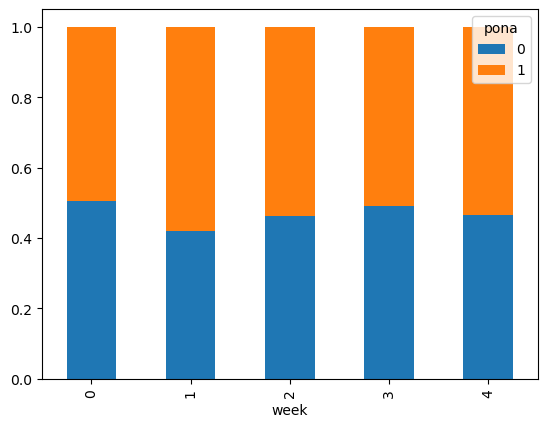

In [62]:
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

In [63]:
# 透视表操作
stock.pivot_table(["pona"], index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


### 4.10 分组与聚合

In [64]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [65]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [66]:
# 对颜色分组，price1进行聚合
# 用dataframe的方法进行分组
col.groupby(by="color")["price1"].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [67]:
# 用Series的方法进行分组
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

### 星巴克零售店铺数据案例

In [68]:
# 1、准备数据
starbucks = pd.read_csv("./datasets/directory.csv")

In [69]:
starbucks

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


<Axes: xlabel='Country'>

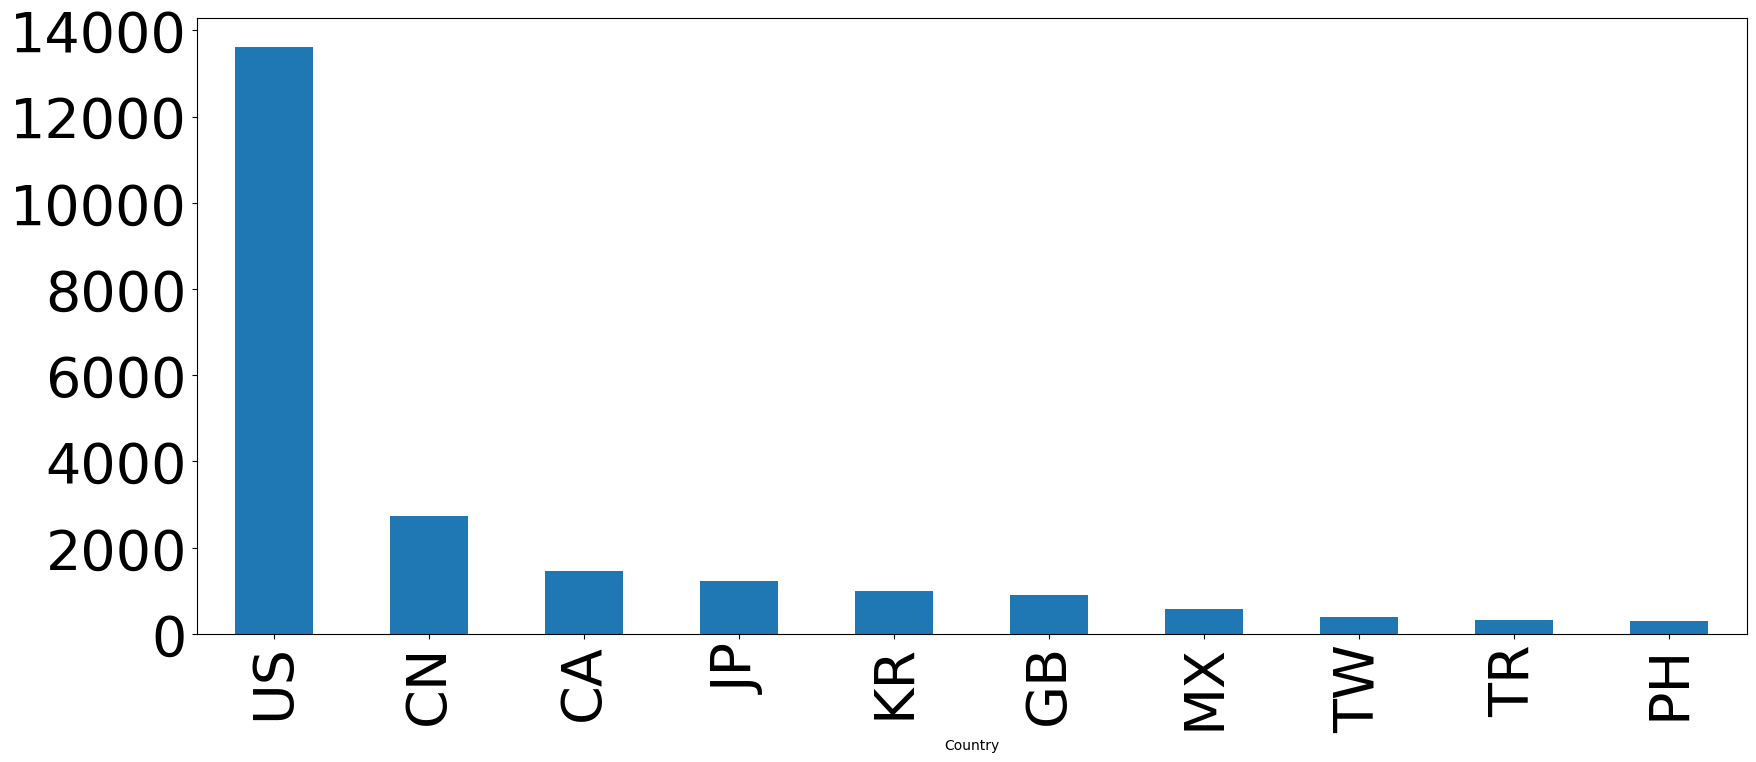

In [70]:
# 按照国家分组，求出每个国家的星巴克零售店数量
starbucks.groupby("Country").count()["Brand"].sort_values(ascending=False)[:10]\
.plot(kind="bar", figsize=(20, 8), fontsize=40)

In [71]:
# 加入省市一起进行分组
starbucks.groupby(by=["Country", "State/Province"]).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

### 4.11 综合案例

In [72]:
# 1、准备数据
movie = pd.read_csv("./datasets/IMDB/IMDB-Movie-Data.csv")

In [73]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


- 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [74]:
# 评分的平均分
movie["Rating"].mean()

6.723199999999999

In [75]:
# 导演的人数
np.unique(movie["Director"]).size

644

- 问题2：对于这一组电影数据，如果我们想知道rating，runtime的分布情况，应该如何呈现数据？

<Axes: ylabel='Frequency'>

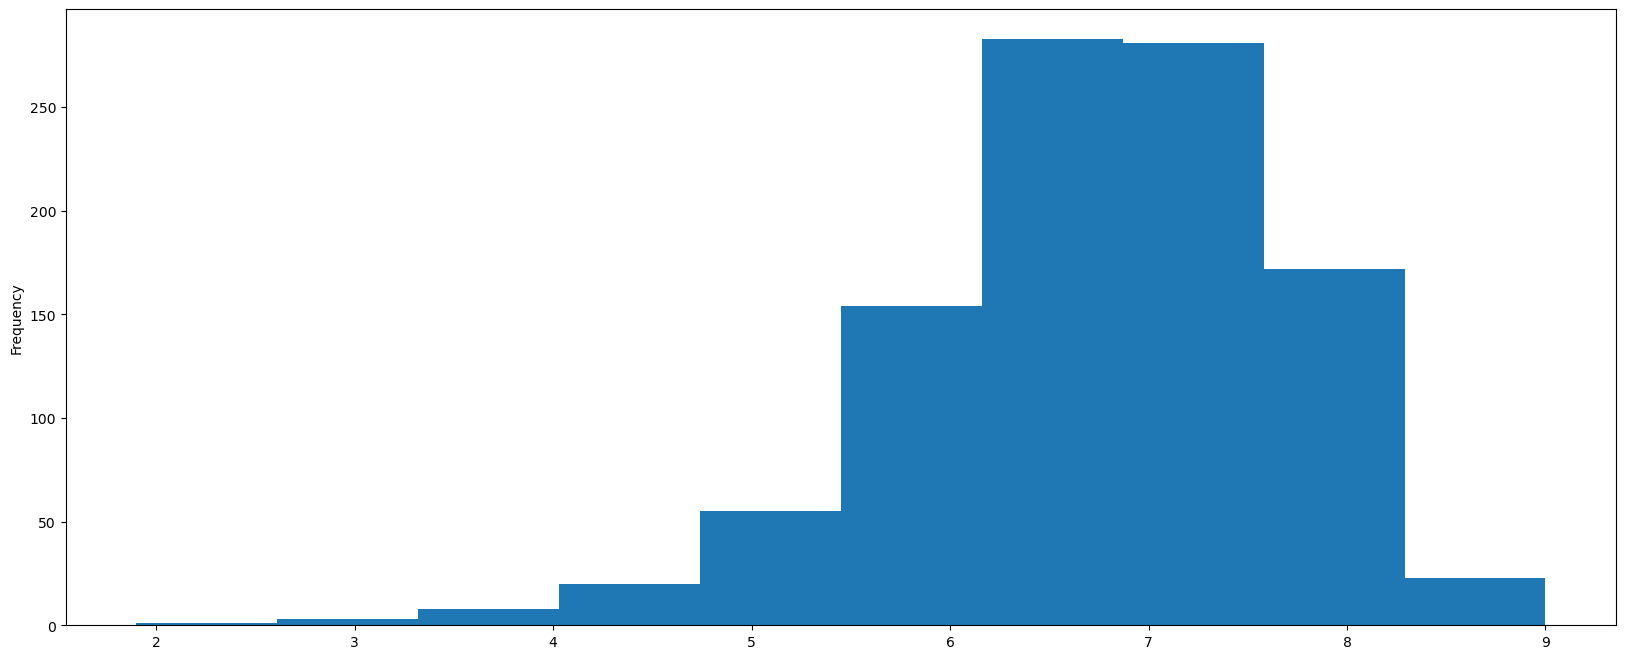

In [76]:
movie["Rating"].plot(kind="hist", figsize=(20, 8))

In [77]:
import matplotlib.pyplot as plt

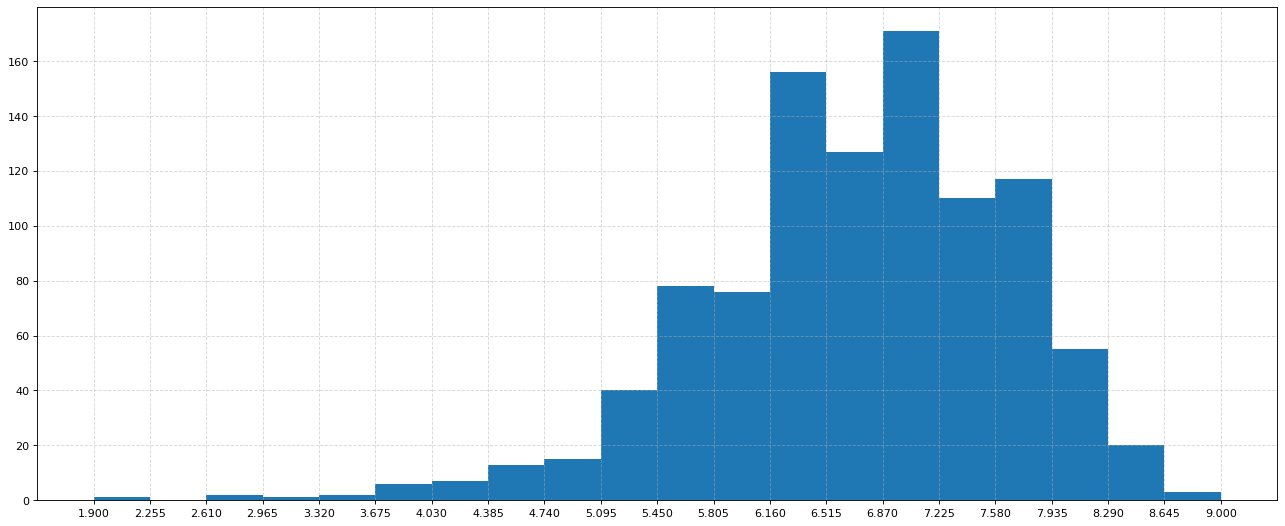

In [78]:
# 1、创建画布
plt.figure(figsize=(20, 8), dpi=80)

# 2、绘制直方图
plt.hist(movie["Rating"], 20)

# 修改刻度
plt.xticks(np.linspace(movie["Rating"].min(), movie["Rating"].max(), 21))

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 3、显示图像
plt.show()

- 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [79]:
# 先统计电影类别都有哪些
movie_genre = [i.split(",") for i in movie["Genre"]]

In [80]:
movie_genre

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [81]:
movie_class = np.unique([j for i in  movie_genre for j in i])

In [82]:
movie_class

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [83]:
len(movie_class)

20

In [84]:
# 统计每个类别有几个电影
count = pd.DataFrame(np.zeros(shape=[1000, 20], dtype="int32"), columns=movie_class)

In [85]:
count

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# 计数填表
for i in range(1000):
    count.loc[i, movie_genre[i]] = 1

In [87]:
count

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

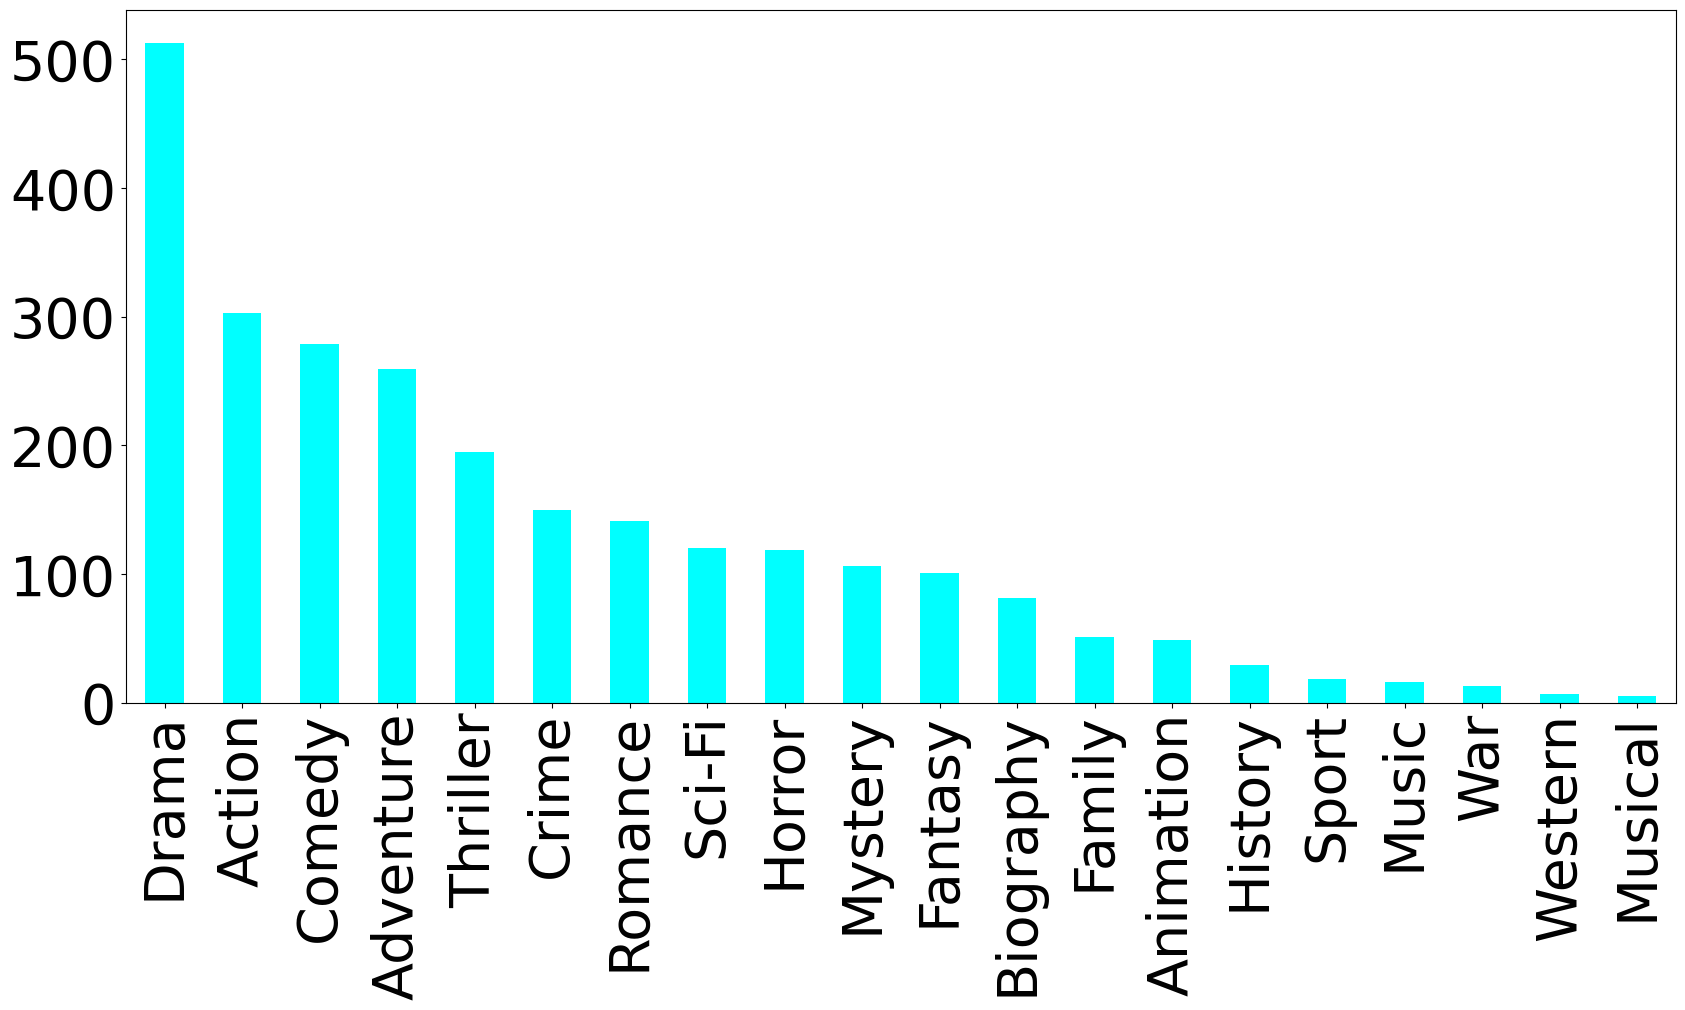

In [88]:
count.sum(axis=0).sort_values(ascending=False).plot(kind="bar", figsize=(20, 9), fontsize=40, colormap="cool")

In [89]:
count.sum()

Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
dtype: int64